# Graphs for exploratory data analysis

In [2]:
import pandas as pd
import numpy as np

df = pd.read_excel('dataset_2023.xlsx')
df = df.drop('Unnamed: 0', axis=1)

## Preprocessing functions to extract the numerical values

In [3]:
def replaceComma(text):
    if "." in str(text): 
        return str("".join(str(text).split("."))).replace(",",".")
    else:
        return str(text).replace(",",".")

def removeLetters(text):
    return "".join(c for c in text if c.isdigit() or c == ".")

def removeThousandPoint(text):
    return str(text).replace(".","")

from datetime import datetime
from dateutil.relativedelta import relativedelta

def calculate_age(registration_date):
    if registration_date == "Neuwagen":
        return 0
    else:
        today = datetime.now()
        date = datetime.strptime(registration_date, "%m/%Y")
        delta = relativedelta(today, date)
        return (delta.years * 12) + delta.months
    
def getConsumption(consumption):
    return str(consumption).split()[0]  

### Applying the preprocessing steps in the correct order to dataframe

In [4]:
columnsNumeric = ["milage", "duration", "monthly_fee", "horsepower", "emission_value", "kilowatts", "consumption"]
def preProcess(columnsNumeric, df):
    
    # calculating age
    
    df['first_registration'] = df['first_registration'].apply(calculate_age)
    
    
    # removing unnecesary characters from consumption
    
    df['consumption'] = df['consumption'].apply(getConsumption)
    
    
    for i in range(len(columnsNumeric)):
        
        
        df[columnsNumeric[i]] = df[columnsNumeric[i]].apply(replaceComma)
        df[columnsNumeric[i]] = df[columnsNumeric[i]].apply(removeLetters)
    
    # removing thousand point from milage column
    
    df["milage"] = df["milage"].apply(removeThousandPoint)
    
    
    # replacing "" and "nan" values from the different 

    df = df.replace('', np.nan)
    df = df.replace('nan', np.nan)
    
    

    
    df[df.columns.difference(['brand_name', 'model_name','fuel_type', 'gear' ])] = df[df.columns.difference(['brand_name', 'model_name','fuel_type', 'gear' ])].astype(float)



    return df

df = preProcess(columnsNumeric, df)

In [5]:
df.head()

,brand_name,model_name,milage,first_registration,duration,gear,monthly_fee,emission_value,consumption,horsepower,kilowatts,fuel_type
0,Skoda,Octavia ŠKODA Combi Style TDI DSG,201.0,2.0,48.0,Automatik,574.01,119.0,5.0,150.0,110.0,Diesel
1,Volkswagen,T-Cross VW Life TSI,201.0,2.0,48.0,Manuelle Schaltung,382.58,131.0,6.0,95.0,70.0,Benzin
2,Seat,Ibiza Austria Edition,15000.0,7.0,48.0,Manuelle Schaltung,239.62,120.0,5.0,80.0,59.0,Benzin
3,Volkswagen,Polo VW,1.0,4.0,48.0,Manuelle Schaltung,309.11,127.0,6.0,80.0,59.0,Benzin
4,Audi,A4 Avant 40 TDI quattro S line,105301.0,41.0,48.0,Automatik,587.75,138.0,5.0,190.0,140.0,Diesel


## Exploratory data analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19058 entries, 0 to 19057
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   brand_name          19058 non-null  object 
 1   model_name          19058 non-null  object 
 2   milage              19058 non-null  float64
 3   first_registration  19058 non-null  float64
 4   duration            19058 non-null  float64
 5   gear                19058 non-null  object 
 6   monthly_fee         19058 non-null  float64
 7   emission_value      18446 non-null  float64
 8   consumption         18446 non-null  float64
 9   horsepower          19058 non-null  float64
 10  kilowatts           19058 non-null  float64
 11  fuel_type           19058 non-null  object 
dtypes: float64(8), object(4)
memory usage: 1.7+ MB


## Plotting the target variable

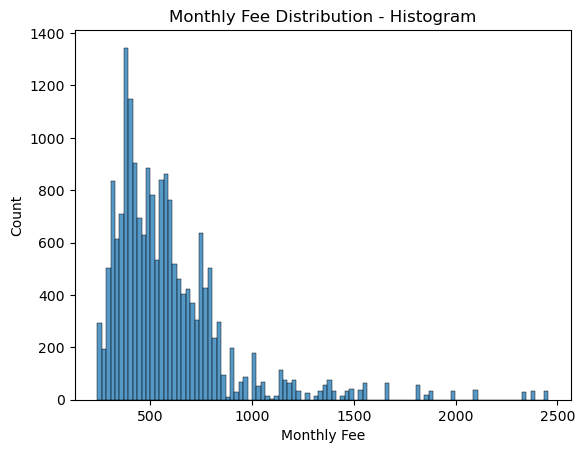

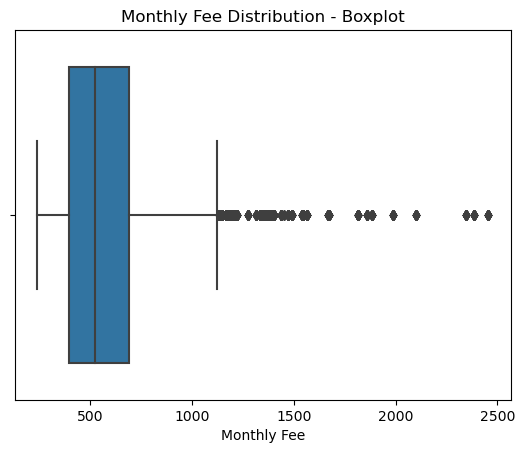

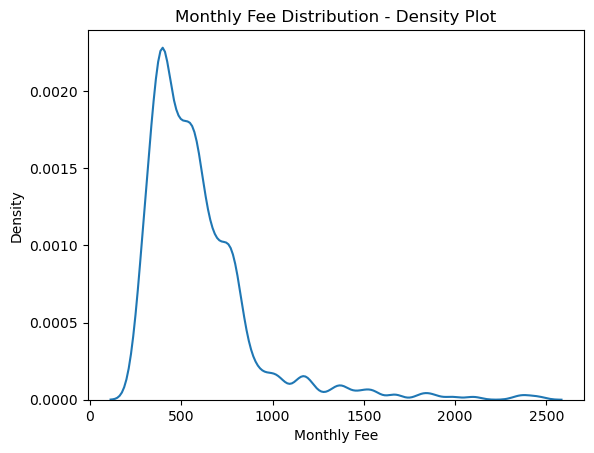

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
sns.histplot(df['monthly_fee'], kde=False)
plt.title('Monthly Fee Distribution - Histogram')
plt.xlabel('Monthly Fee')
plt.ylabel('Count')
plt.show()

# Boxplot
sns.boxplot(x=df['monthly_fee'])
plt.title('Monthly Fee Distribution - Boxplot')
plt.xlabel('Monthly Fee')
plt.show()

# Density plot
sns.kdeplot(df['monthly_fee'])
plt.title('Monthly Fee Distribution - Density Plot')
plt.xlabel('Monthly Fee')
plt.ylabel('Density')
plt.show()


## Correlation matrix

C:\Users\sinah\AppData\Local\Temp\ipykernel_13792\3589353080.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_corr = df.drop(['brand_name', "model_name", "fuel_type","gear"], 1).corr()


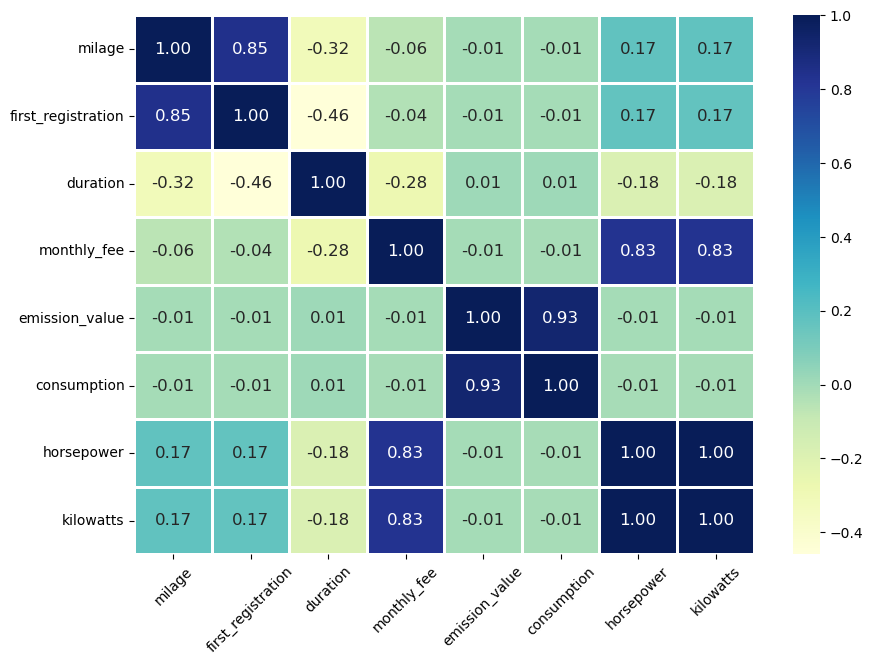

In [9]:
# dropping categorical values first
df_corr = df.drop(['brand_name', "model_name", "fuel_type","gear"], 1).corr()

# setting figure size
plt.figure(figsize=(10,7))

# heatmap
sns.heatmap(df_corr, annot=True, linewidths=1.01, fmt = ".2f", annot_kws={"size": 12}, linecolor='white', cmap="YlGnBu")

plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.savefig('correaltion_heatmap.png', dpi = 100, bbox_inches="tight")
plt.show()

## Count, mean, standard deviation, minimum value, 25th percentile, median, 75th percentile, 85th percentile, 90th percentile, and maximum of target variable

In [13]:
print(df.monthly_fee.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))


count    19058.000000
mean       592.986471
std        303.909560
min        239.620000
25%        397.160000
50%        521.930000
75%        689.830000
85%        792.320000
90%        867.190000
100%      2455.470000
max       2455.470000
Name: monthly_fee, dtype: float64


## Visualising categorical variables

In [22]:
# NOTE: We have 346 different unique model_names. So this is the one that I didn't plotted

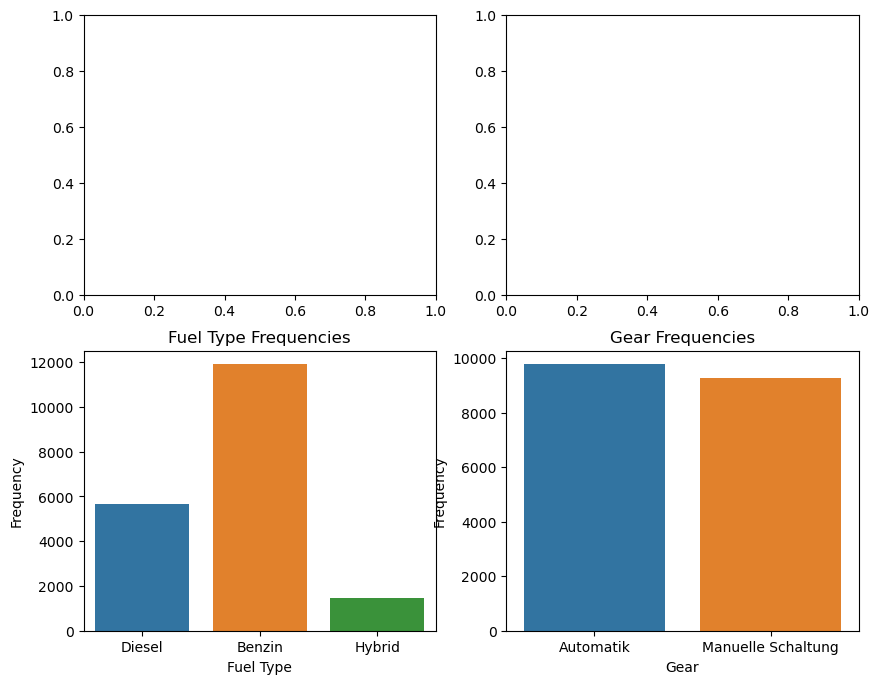

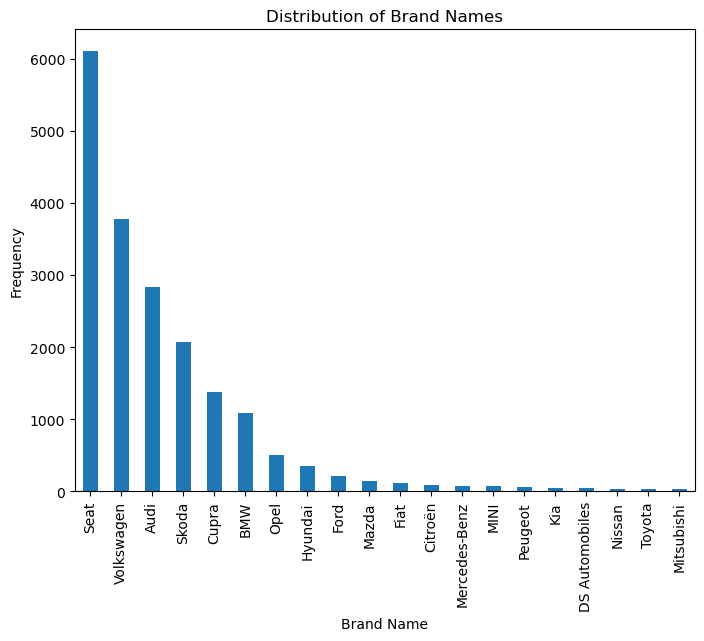

In [21]:
import seaborn as sns

# Create subplots for each categorical variable
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10, 8))




# Fuel type barplot
sns.countplot(x='fuel_type', data=df, ax=axs[1,0])
axs[1,0].set_xlabel('Fuel Type')
axs[1,0].set_ylabel('Frequency')
axs[1,0].set_title('Fuel Type Frequencies')

# Gear barplot
sns.countplot(x='gear', data=df, ax=axs[1,1])
axs[1,1].set_xlabel('Gear')
axs[1,1].set_ylabel('Frequency')
axs[1,1].set_title('Gear Frequencies')


plt.figure(figsize=(8, 6))
df['brand_name'].value_counts().plot(kind='bar')
plt.title('Distribution of Brand Names')
plt.xlabel('Brand Name')
plt.ylabel('Frequency')
plt.show()



## Plotting target variable vs categorical variables

<Figure size 2500x600 with 0 Axes>

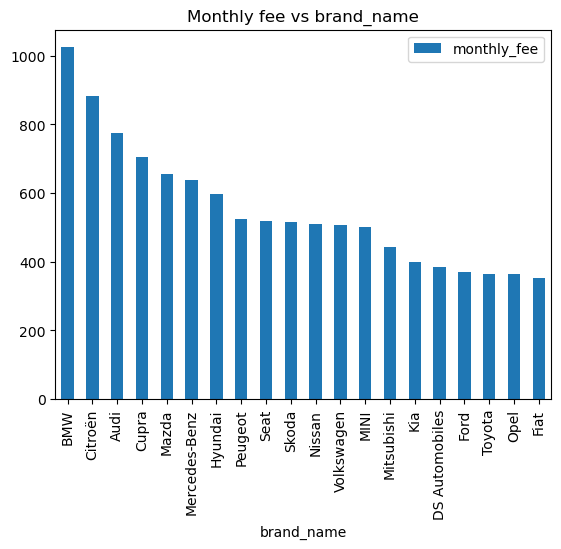

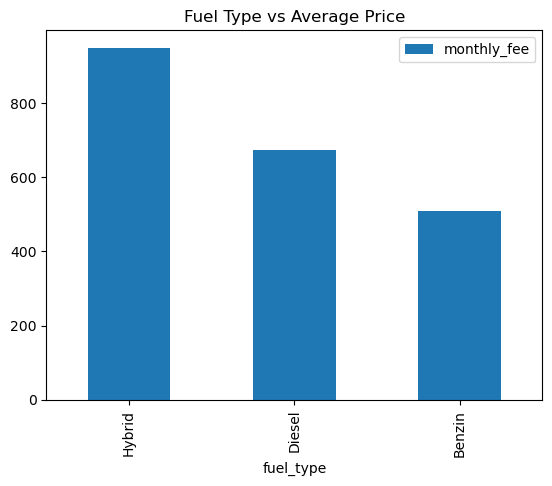

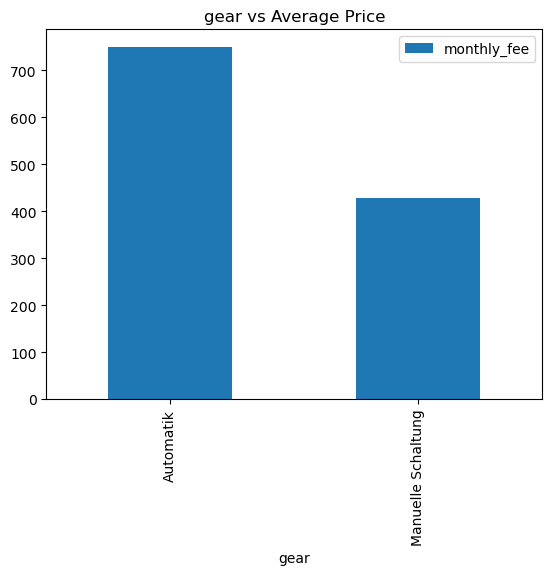

In [8]:
plt.figure(figsize=(25, 6))

df_brand = pd.DataFrame(df.groupby(['brand_name'])['monthly_fee'].mean().sort_values(ascending = False))
df_brand.plot.bar()
plt.title('Monthly fee vs brand_name')
plt.show()

df_fueltype = pd.DataFrame(df.groupby(['fuel_type'])['monthly_fee'].mean().sort_values(ascending = False))
df_fueltype.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df_gear = pd.DataFrame(df.groupby(['gear'])['monthly_fee'].mean().sort_values(ascending = False))
df_gear.plot.bar()
plt.title('gear vs Average Price')
plt.show()

## Scatterplot

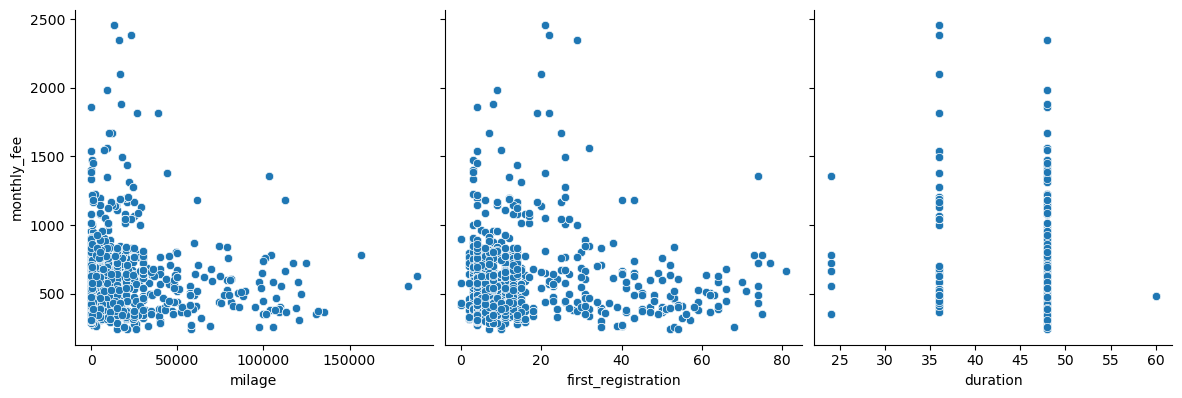

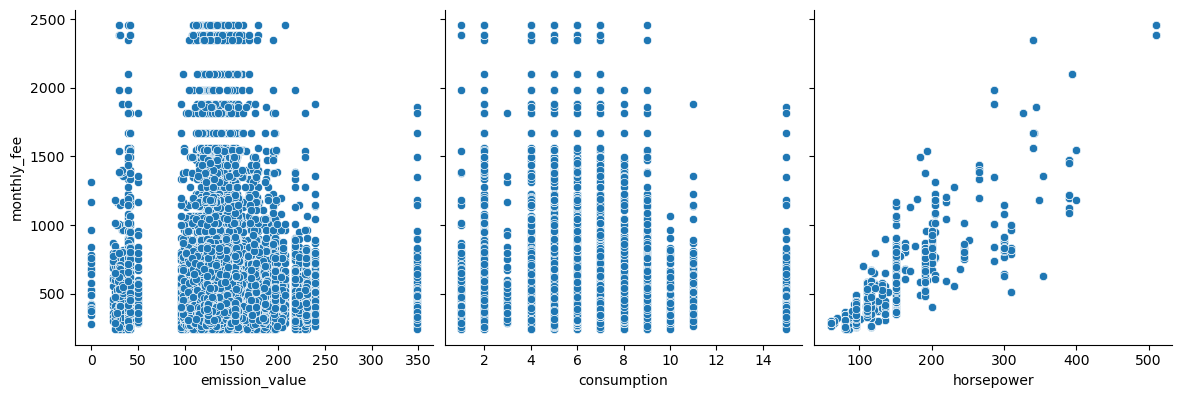

In [13]:
def pp(x,y,z):
    sns.pairplot(df, x_vars=[x,y,z], y_vars='monthly_fee',height=4, aspect=1, kind='scatter')
    plt.show()

pp('milage', 'first_registration', 'duration')
pp('emission_value', 'consumption', 'horsepower')

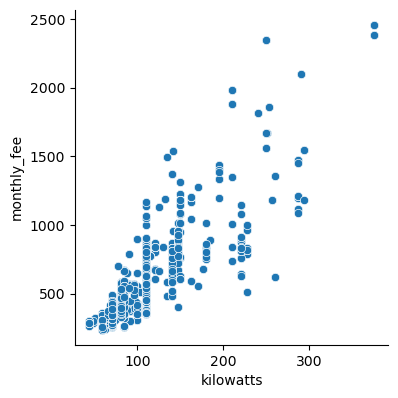

In [14]:
def pp(x):
    sns.pairplot(df, x_vars=[x], y_vars='monthly_fee',height=4, aspect=1, kind='scatter')
    plt.show()

pp('kilowatts')